# ABOUT:
- This notebook explores a real-life user-purchase/user-interaction data from a shopee based seller

In [16]:
import pandas as pd
import os
import seaborn as sb
from numpy import log

## read shopee data

In [2]:
directory = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\data\shopee-20221117T041452Z-001\shopee"
os.chdir(directory)

In [4]:
data = pd.DataFrame()
usecols = ['Order ID', "Ship Time", "Username (Buyer)", "Product Name", "Deal Price", "Quantity", "Voucher Code", "Username (Buyer)", "Zip Code"]
for file in os.listdir(directory):
    if "Order" in file:
        tmp = pd.read_excel(file, usecols=usecols)
        data = pd.concat([data,tmp], axis = 0)
data.drop_duplicates(inplace = True)

In [46]:
data.head()

,Order ID,Ship Time,Product Name,Deal Price,Quantity,Voucher Code,Username (Buyer),Zip Code
0,210701QG5V2NT4,2021-07-02 16:45,1Pcs Self-heating Magnet Wrist Support Brace G...,9.0,1,NaN,superrockmen,310261
1,210701QG5V2NT4,2021-07-02 16:45,1Pcs Self-heating Magnet Wrist Support Brace G...,15.8,1,NaN,superrockmen,310261
2,210701QSRHFY5W,2021-07-02 16:45,Hot Magnetic Back Support Brace Belt Lumbar Lo...,15.8,1,CASHBACKAD6,iralia7801,734688
3,210701RCFJF50G,2021-07-02 16:42,1Pair Big Bone Orthopedic Bunion Correction Pe...,15.8,1,NaN,dynshmi,601219
4,210701RHSPS5TT,2021-07-02 16:45,1Pair Big Bone Orthopedic Bunion Correction Pe...,15.8,1,SPPNEWJUL,nancywom,163008


## Insight: 
- **most are cold start users**

[Text(0.5, 0, 'Number of Purchases by Users')]

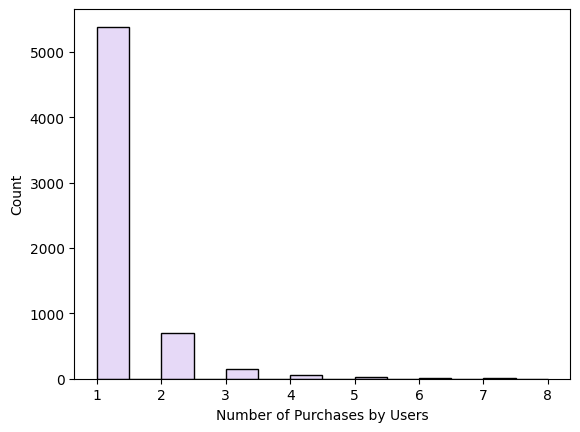

In [44]:
p = sb.histplot(data['Username (Buyer)'].value_counts(), color = "#DECDF5", kde = False)
p.set(xlabel = "Number of Purchases by Users")

In [39]:
data[data['Username (Buyer)']=="phamandbingbing"]

,Order ID,Ship Time,Product Name,Deal Price,Quantity,Voucher Code,Username (Buyer),Zip Code
132,220311MN64E61G,2022-03-12 08:57,Therapeutic blackCopper Compression Arthritis ...,9.02,1,NaN,phamandbingbing,431005
176,220510QMSG4KW1,2022-05-10 08:03,Shoulder Stability Brace with Pressure Pad Lig...,10.24,1,NaN,phamandbingbing,329768
319,220517EART5U57,2022-05-18 18:36,Shoulder Stability Brace with Pressure Pad Lig...,12.64,1,NaN,phamandbingbing,510628
571,2205267X118KU9,2022-05-27 13:18,Shoulder Stability Brace with Pressure Pad Lig...,10.24,1,BAUALL1OFFFMAY26,phamandbingbing,510147
52,2208024BNVY5NV,2022-08-04 13:53,Magnetic Therapy Self-Heating Arm Elbow Brace ...,12.80,1,NaN,phamandbingbing,574044


## Insight:
- **there are lots of long tail products**

[Text(0.5, 0, 'Number of Purchases for a given Product')]

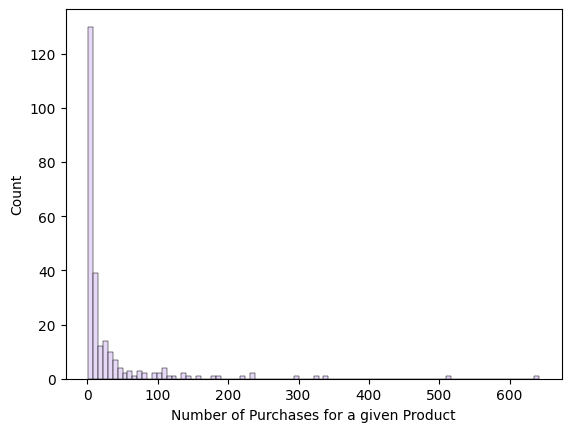

In [45]:
p = sb.histplot(data['Product Name'].value_counts(), color = "#DECDF5", kde = False)
p.set(xlabel = "Number of Purchases for a given Product")

In [53]:
product_data = pd.read_excel("mass_update_basic_info_120171733_20221116234237.xlsx", header = 2)
product_data

,Product ID,Parent SKU,Product Name,Product Description,Result,Fail Reason
0,23702943029,NaN,Wifi IP Camera PTZ Light Bulb Camera E27 Socke...,Overview\nEssential details\n\nWarranty: 3 mo...,NaN,NaN
1,23501665694,NaN,Stainless Steel Necklace with Arrow Pendant Je...,Vintage Men Stainless Steel Necklace Jewelry P...,NaN,NaN
2,23304243446,NaN,Thermos Vacuum Flasks 304 Stainless Steel Insu...,450ml Leakproof Double Wall thermos Vacuum Fla...,NaN,NaN
3,22505247347,NaN,Candle Soya wax with Crystal 3 pcs Randam design,Candles soya wax with crystal,NaN,NaN
4,22503134229,NaN,"Ice Pack for Knee Pain Relief, Reusable Gel Ic...",KNEE GEL PACK WRAP PAIN RELIEF INSTEAD OF HARM...,NaN,NaN
...,...,...,...,...,...,...
271,3333330067,NaN,Bunion Corrector Orthopedic Bunion Correctors ...,\nBig Bone Orthopedic Bunion Correction Pedicu...,NaN,NaN
272,3295377541,NaN,Magnetic Therapy Self-Heating Arm Elbow Brace ...,Products description\n\n* Brand new and high q...,NaN,NaN
273,3295353571,NaN,Carpal Tunnel Wrist Brace Support - Wrist Spli...,Products descriptions\n\nUNIVERSAL USE: With c...,NaN,NaN
274,3233299909,NaN,Sport Face Mask with Activated Carbon Pm 2.5 r...,Sport Face Mask With Activated Carbon Pm 2.5 A...,NaN,NaN


## Insight on Data acquisition:
- **It may be difficult to acquire user-interaction data**
- for shopee:
    - user-interaction data can be downloaded, BUT the seller can download only 1 month of interaction data per minute (which is a hassle)
    - product catalog download can be downloaded easily at one go. this includes product name and description
    - reviews cannot be directly downloaded though, it could be scraped (against shopee rules)

### Summary:
- we are dealing with two main problems:
    1. it may be diffcult to acquire the data we need i.e user interaction data
    2. the data itself may not be suitable due to a high proportion of cold start users and items
    